# Exploring Weather Trends

### Getting Data
```SQL
SELECT * FROM global_data

SELECT * FROM city_list WHERE city LIKE 'Berlin'

SELECT * FROM city_data WHERE city LIKE 'Berlin'
```

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Loading Datasets

In [2]:
global_df = pd.read_csv('global_data.csv')
berlin_df = pd.read_csv('city_data.csv')

In [3]:
global_df.sample(10)

,year,avg_temp
94,1844,7.65
154,1904,8.09
95,1845,7.85
161,1911,8.18
87,1837,7.38
214,1964,8.41
62,1812,7.05
255,2005,9.70
113,1863,8.11
228,1978,8.69


In [4]:
berlin_df.sample(10)

,year,city,country,avg_temp
177,1920,Berlin,Germany,9.37
125,1868,Berlin,Germany,10.24
218,1961,Berlin,Germany,9.81
79,1822,Berlin,Germany,10.05
90,1833,Berlin,Germany,8.89
80,1823,Berlin,Germany,8.26
67,1810,Berlin,Germany,8.46
158,1901,Berlin,Germany,8.58
174,1917,Berlin,Germany,8.39
105,1848,Berlin,Germany,8.75


### Exploring Data

In [5]:
berlin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 4 columns):
year        271 non-null int64
city        271 non-null object
country     271 non-null object
avg_temp    267 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.5+ KB


Data is missing in `avg_temp` column in the `berlin_df` dataframe.

In [6]:
# viewing number of missing values
sum(berlin_df["avg_temp"].isna())

4

In [7]:
# viewing NaN values
berlin_df[berlin_df['avg_temp'].isna()]

,year,city,country,avg_temp
3,1746,Berlin,Germany,NaN
4,1747,Berlin,Germany,NaN
5,1748,Berlin,Germany,NaN
6,1749,Berlin,Germany,NaN


In [8]:
global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
year        266 non-null int64
avg_temp    266 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.2 KB


No data is missing in the `global_df` dataframe.

In [9]:
berlin_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,271.0,1878.000000,78.375166,1743.00,1810.50,1878.00,1945.50,2013.00
avg_temp,267.0,8.885393,1.007305,1.43,8.35,8.93,9.49,10.96


**Minimum year in `berlin_df`: 1743 <br>
Maximum year in `berlin_df`: 2013**

In [10]:
global_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,266.0,1882.500000,76.931788,1750.00,1816.2500,1882.500,1948.7500,2015.00
avg_temp,266.0,8.369474,0.584747,5.78,8.0825,8.375,8.7075,9.83


**Minimum year in `global_df`: 1750 <br>
Maximum year in `global_df`: 2015**

Since `global_df` contains data from year 1750 - 2015 and the missing data in the `berlin_df` is for years less than 1750 so we simply drop those years.

Also, `global_df` contains data till 2015 and `berlin_df` contains data till 2013 so we drop last two year from `global_df` dataframe.

In [11]:
berlin_df = berlin_df[(berlin_df['year'] >= 1750)].copy()
global_df = global_df[(global_df['year'] <= 2013)].copy()

Checking both dataframe have same length.

In [12]:
len(berlin_df) == len(global_df)

True

### Calculating Moving Average

In [13]:
#moving average for berlin_df
berlin_df["moving_avg"] = berlin_df["avg_temp"].rolling(window = 10).mean()

#reseting the index of the berlin_df dataframe
berlin_df.reset_index(inplace = True, drop = True)

#moving average for global_df
global_df["moving_avg"] = global_df["avg_temp"].rolling(window = 10).mean()

In [14]:
berlin_df.head(13)

,year,city,country,avg_temp,moving_avg
0,1750,Berlin,Germany,9.83,NaN
1,1751,Berlin,Germany,9.75,NaN
2,1752,Berlin,Germany,4.84,NaN
3,1753,Berlin,Germany,8.72,NaN
4,1754,Berlin,Germany,8.49,NaN
5,1755,Berlin,Germany,8.26,NaN
6,1756,Berlin,Germany,9.62,NaN
7,1757,Berlin,Germany,9.15,NaN
8,1758,Berlin,Germany,8.25,NaN
9,1759,Berlin,Germany,9.04,8.595


In [15]:
global_df.head(13)

,year,avg_temp,moving_avg
0,1750,8.72,NaN
1,1751,7.98,NaN
2,1752,5.78,NaN
3,1753,8.39,NaN
4,1754,8.47,NaN
5,1755,8.36,NaN
6,1756,8.85,NaN
7,1757,9.02,NaN
8,1758,6.74,NaN
9,1759,7.99,8.030


### Plotting Global Average and Global Moving Average Temprature

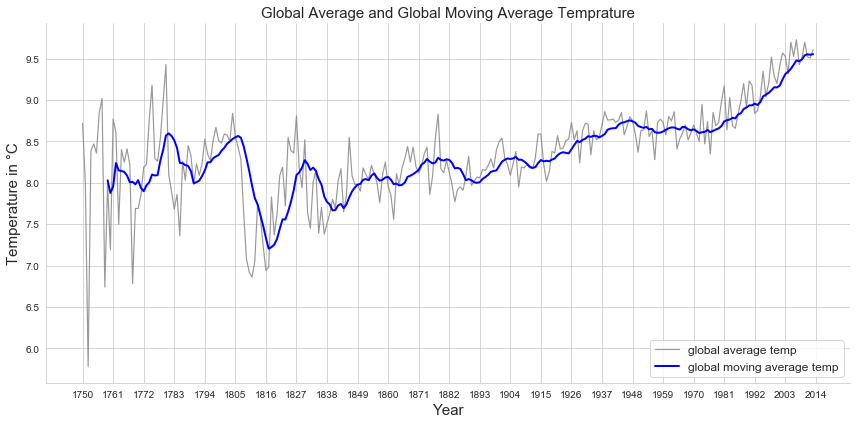

Global Average Temperature: 8.36 °C
Maximun Global Average Temperature: 9.73 °C
Minimum Global Average Temperature: 5.78 °C


In [16]:
#set plot style to whitegrid
sns.set_style("whitegrid")

#creating matplotlib figure and axes
fig, ax = plt.subplots(figsize = (12,6))


#plotting average and moving average of global temp
sns.lineplot(x = "year", y = "avg_temp", data = global_df, label = "global average temp", alpha = 0.8,
             color = "grey", linewidth = 1.2)

sns.lineplot(x = "year", y = "moving_avg", data = global_df, label = "global moving average temp",
             color = "blue", linewidth = 2)

#show legend
ax.legend(fontsize=12)

#set y label
ax.set_ylabel("Temperature in °C", fontsize=15)

#set x label
ax.set_xlabel("Year", fontsize=15)

#set title
ax.set_title("Global Average and Global Moving Average Temprature", fontsize=15)

#disable right and top border
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#set x-axis ticks 
plt.xticks(np.linspace(min(global_df['year']),max(global_df['year'])+1,25))

#nicely fit the plot layout
plt.tight_layout()

#show plot
plt.show()


print('Global Average Temperature: {:.2f} °C'.format(global_df["avg_temp"].mean()))
print('Maximun Global Average Temperature: {:.2f} °C'.format(global_df["avg_temp"].max()))
print('Minimum Global Average Temperature: {:.2f} °C'.format(global_df["avg_temp"].min()))

#### Observation
* Huge temperature drop between 1805 and 1816.
* From 1893 average temperature is increasing over time.
* Rapid increase in temprature from 1970.

### Plotting Berlin Average and Berlin Moving Average Temperature

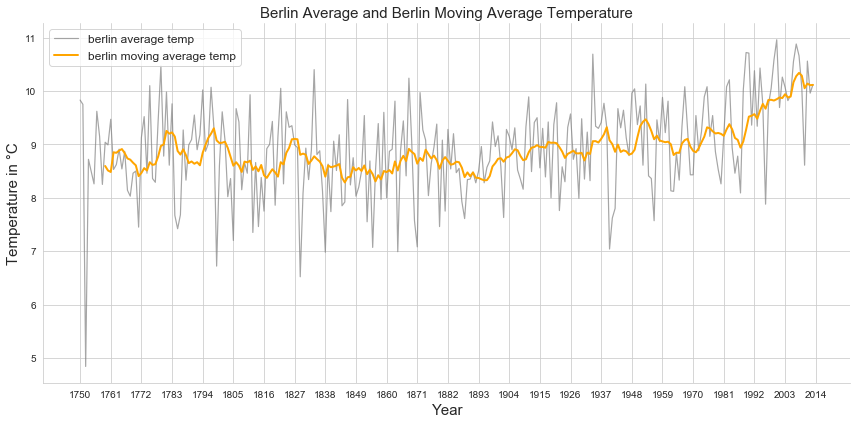

Average Temperature of Berlin: 8.92 °C
Maximun Average Temperature of Berlin: 10.96 °C
Minimum Average Temperature of Berlin: 4.84 °C


In [17]:
#creating matplotlib figure and axes
fig, ax = plt.subplots(figsize = (12,6))

#set plot style to whitegrid
sns.set_style("whitegrid")

#plotting average and moving average of Berlin temp
sns.lineplot(x = "year", y = "avg_temp", data = berlin_df, label = "berlin average temp", alpha = 0.7,
             color = "grey", linewidth = 1.2)

sns.lineplot(x = "year", y = "moving_avg", data = berlin_df, label = "berlin moving average temp",
             color = "orange", linewidth = 2)

#show legend
ax.legend(fontsize=12)

#set y label
ax.set_ylabel("Temperature in °C", fontsize=15)

#set x label
ax.set_xlabel("Year", fontsize=15)

#set title
ax.set_title("Berlin Average and Berlin Moving Average Temperature", fontsize=15)

#disable right and top border
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#set x-axis ticks
plt.xticks(np.linspace(min(berlin_df['year']),max(berlin_df['year'])+1,25))

#tighten the plot layout
plt.tight_layout()

#show plot
plt.show()


print('Average Temperature of Berlin: {:.2f} °C'.format(berlin_df["avg_temp"].mean()))
print('Maximun Average Temperature of Berlin: {:.2f} °C'.format(berlin_df["avg_temp"].max()))
print('Minimum Average Temperature of Berlin: {:.2f} °C'.format(berlin_df["avg_temp"].min()))

#### Observation
* From 1894 average tempreture of Berlin is increasing over time.
* Rapid increase in temprature from 1985.

### Plotting Global and Berlin Moving Average Temperature

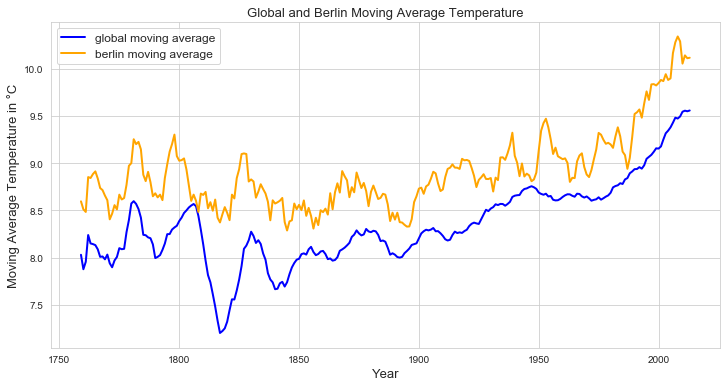

Average Temperature of Berlin: 8.92 °C
Global Average Temperature: 8.36 °C
Average Temperature Difference: 0.558 °C


In [18]:
#create a matplotlib figure and axes
fig, ax = plt.subplots(figsize = (12,6))

#plotting moving average of global temp
sns.lineplot(x = "year", y = "moving_avg", data = global_df, label = "global moving average",
             color = "blue", linewidth = 2)

#plotting moving average of berlin temp 
sns.lineplot(x = "year", y = "moving_avg", data = berlin_df, label = "berlin moving average",
             color= 'orange', linewidth = 2)

#show legend
ax.legend(fontsize=12)

#set y label
ax.set_ylabel("Moving Average Temperature in °C", fontsize=13)

#set x label
ax.set_xlabel("Year", fontsize=13)

#set title
ax.set_title("Global and Berlin Moving Average Temperature", fontsize=13)

plt.show()

print('Average Temperature of Berlin: {:.2f} °C'.format(berlin_df["avg_temp"].mean()))
print('Global Average Temperature: {:.2f} °C'.format(global_df["avg_temp"].mean()))
print('Average Temperature Difference: {:.3f} °C'.format(berlin_df["avg_temp"].mean() - global_df["avg_temp"].mean()))

#### Observation
* Berlin temperature also dropped when there was huge drop in global temperature around 1805.
* Average temperature of global and Berlin is increasing over time.
* Average temperature diffrence bettween Berlin and global is 0.558 °C.

### Linear Regression

In [19]:
global_trend = LinearRegression()

X = global_df[["year"]]
y = global_df[["avg_temp"]]

global_trend.fit(X, y)

global_df["trend"] = global_trend.predict(X)

In [20]:
local_trend = LinearRegression()

X = berlin_df[["year"]]
y = berlin_df[["avg_temp"]]

local_trend.fit(X, y)

berlin_df["trend"] = local_trend.predict(X)

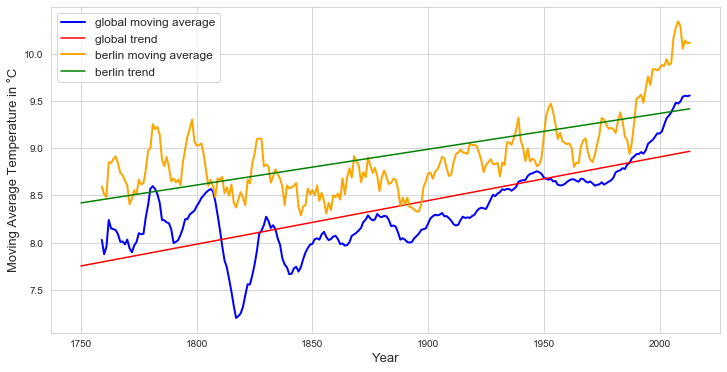

Global Slope: 0.00461


Berlin Slope: 0.00378


In [21]:
#create a matplotlib figure and axes
fig, ax = plt.subplots(figsize = (12,6))

sns.lineplot(x = "year", y = "moving_avg", data = global_df, label = "global moving average",
             color = "blue", linewidth = 2)

sns.lineplot(x = "year", y = "trend", data = global_df, label = "global trend", color = "red")

sns.lineplot(x = "year", y = "moving_avg", data = berlin_df, label = "berlin moving average",
             color = 'orange', linewidth = 2)

sns.lineplot(x = "year", y = "trend", data = berlin_df, label = "berlin trend", color = 'green')

#show legend
ax.legend(fontsize=12)

#set y label
ax.set_ylabel("Moving Average Temperature in °C", fontsize=13)

#set x label
ax.set_xlabel("Year", fontsize=13)

plt.show()

# global_df
print('Global Slope: {:.5f}'.format(global_trend.coef_[0][0]))
print('\n')
# berlin_df
print('Berlin Slope: {:.5f}'.format(local_trend.coef_[0][0]))


#### Observation
* Slope of Berlin is smaller than the global slope, which means that the global average temperature is increasing faster.
* Both global and Berlin average temperature is increasing over time.
* Average temperature of Berlin is slightly higher than global average temperature.

### Correlation Coefficient

In [22]:
# Correlation coefficient of global data
global_df[['year','avg_temp','moving_avg']].corr()

,year,avg_temp,moving_avg
year,1.000000,0.612115,0.744770
avg_temp,0.612115,1.000000,0.805994
moving_avg,0.744770,0.805994,1.000000


In [23]:
# Correlation Coefficient of berlin data
berlin_df[['year','avg_temp','moving_avg']].corr()

,year,avg_temp,moving_avg
year,1.000000,0.327048,0.633135
avg_temp,0.327048,1.000000,0.517361
moving_avg,0.633135,0.517361,1.000000


In [24]:
#calculating correlation between berlin average temp and global average temp
berlin_df[["avg_temp"]].corrwith(global_df["avg_temp"])

avg_temp    0.515946
dtype: float64

With 0.515 correlation coefficient Berlin data are moderately correlated with global data.

### Conclusion
* Average temperature of global and Berlin is rising over time.
* From 1980 temperature is continuously rising.
* Berlin is getting hotter over time.
* Average temperature change between global and Berlin is very small.
* Temperature of Berlin is increasing because large natural landscapes are replaced with buildings and asphalt streets that absorb more heat which making cities warmer.